In [2]:
# data => Social_Network_Ads.csv
# location => https://mitu/co.in/dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [5]:
df.shape

(400, 5)

In [6]:
# check for missing values

df.isna().sum().sum()

0

In [7]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [8]:
# separate input and output

x = df[["Age", 'EstimatedSalary']]
y = df["Purchased"]

In [9]:
x.shape

(400, 2)

In [10]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


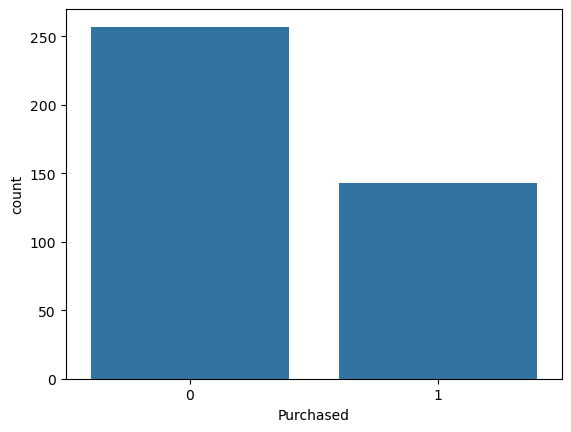

In [11]:
sns.countplot(x = y);

In [12]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

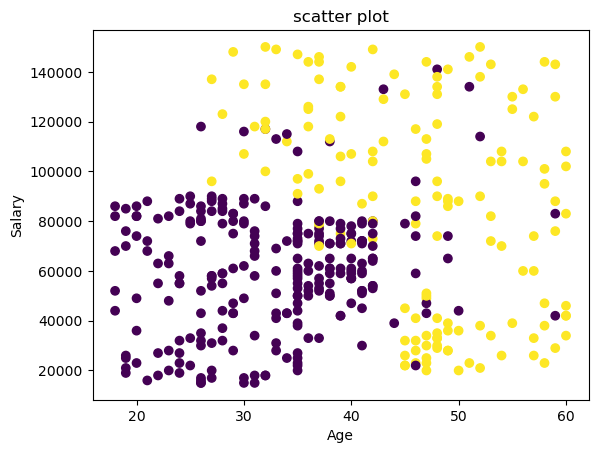

In [13]:
plt.title("scatter plot")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.scatter(x["Age"], x['EstimatedSalary'], c = y);

In [14]:
# feature scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [16]:
x_scaled = scaler.fit_transform(x)

In [17]:
pd.DataFrame(x_scaled).describe()

,0,1
count,400.000000,400.000000
mean,0.467976,0.405500
std,0.249592,0.252570
min,0.000000,0.000000
25%,0.279762,0.207407
50%,0.452381,0.407407
75%,0.666667,0.540741
max,1.000000,1.000000


In [18]:
# cross validation

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                                   random_state= 0,
                                                   test_size= 0.25)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [21]:
log= LogisticRegression()
dt = DecisionTreeClassifier(random_state= 0)
knn = KNeighborsClassifier(n_neighbors= 5)
nb = GaussianNB()
svc = SVC(kernel= 'rbf')

In [22]:
log.fit(x_train, y_train)
dt.fit(x_train, y_train)
knn.fit(x_train, y_train)
nb.fit(x_train, y_train)
svc.fit(x_train, y_train)

SVC()

In [23]:
log_pred = log.predict(x_test)
dt_pred = dt.predict(x_test)
knn_pred = knn.predict(x_test)
nb_pred = nb.predict(x_test)
svc_pred = svc.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score

In [26]:
print(f"accuracy score of logistic: {accuracy_score(y_test, log_pred)}")
print(f"accuracy score of decision tree: {accuracy_score(y_test, dt_pred)}")
print(f"accuracy score of knn: {accuracy_score(y_test, knn_pred)}")
print(f"accuracy score of naive bayes: {accuracy_score(y_test, nb_pred)}")
print(f"accuracy score of svm: {accuracy_score(y_test, svc_pred)}")

accuracy score of logistic: 0.89
accuracy score of decision tree: 0.9
accuracy score of knn: 0.93
accuracy score of naive bayes: 0.9
accuracy score of svm: 0.93


#### Stacking

In [27]:
from sklearn.ensemble import StackingClassifier

In [31]:
stack = StackingClassifier(estimators=[("dt", dt),
                                       ("knn", knn),
                                       ("nb", nb),
                                       ("svm", svc)],
                                       final_estimator= log)

In [32]:
stack.fit(x_train, y_train)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=0)),
                               ('knn', KNeighborsClassifier()),
                               ('nb', GaussianNB()), ('svm', SVC())],
                   final_estimator=LogisticRegression())

In [35]:
y_pred_stack = stack.predict(x_test)

accuracy_score(y_test, y_pred_stack)

0.93